# Sprint24課題 ゲート付きリカレントニューラルネットワーク

## この課題の目的

- 発展的なRNNの手法を理解する

## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーが用意されています。今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

次の11個の項目があります。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

## 【問題1】各種手法の実行

Keras公式のサンプルをスタートコードとします。これを元に、上記11個の項目全てを使用してください。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行えます。そういった関係を見つけて比較をしてください。

なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできません。

LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

## 【問題2】比較結果の説明

11の項目それぞれがどういうものなのかを説明してください。また、比較した結果を表やグラフで載せ、説明してください。今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」という仮定を置きます。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

In [1]:
!pip install numpy==1.16.1

In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import (Dense, Embedding, LSTM, RNN, SimpleRNN, GRU, SimpleRNNCell, 
                                              GRUCell, LSTMCell, StackedRNNCells, CuDNNGRU, CuDNNLSTM)
from keras.datasets import imdb
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K 
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples X time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples X time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


### SimpleRNN

In [4]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(SimpleRNN(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

W0627 01:56:24.980899 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 01:56:25.019551 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 01:56:25.025479 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 01:56:25.065805 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 01:56:25.074829 

Build model...


In [5]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0627 01:56:27.474921 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 01:56:27.512780 140129182734208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0627 01:56:27.518773 140129182734208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
simplernn_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6889 - acc: 0.5449 - val_loss: 0.6583 - val_acc: 0.6482
Epoch 2/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.6072 - acc: 0.6753 - val_loss: 0.5240 - val_acc: 0.7488
Epoch 3/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4884 - acc: 0.7671 - val_loss: 0.5208 - val_acc: 0.7434


In [87]:
print('実行時間 : ', simplernn_time, '秒')

実行時間 :  97.96296787261963 秒


In [7]:
score, simplernn_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', simplernn_acc)

25000/25000 [==============================] - 6s 227us/step
Test score: 0.5207754162311554
Test accuracy: 0.7434


### GRU

In [8]:
print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(GRU(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
gru_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.5353 - acc: 0.7193 - val_loss: 0.4434 - val_acc: 0.7954
Epoch 2/3
25000/25000 [==============================] - 94s 4ms/step - loss: 0.3657 - acc: 0.8463 - val_loss: 0.4109 - val_acc: 0.8127
Epoch 3/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2918 - acc: 0.8832 - val_loss: 0.4008 - val_acc: 0.8220


In [89]:
print('実行時間 : ', gru_time, '秒')

実行時間 :  284.9179027080536 秒


In [11]:
score, gru_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', gru_acc)

25000/25000 [==============================] - 17s 668us/step
Test score: 0.4007590243625641
Test accuracy: 0.82196


### LSTM

In [12]:
print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
lstm_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 118s 5ms/step - loss: 0.5038 - acc: 0.7544 - val_loss: 0.4184 - val_acc: 0.8128
Epoch 2/3
25000/25000 [==============================] - 118s 5ms/step - loss: 0.3325 - acc: 0.8652 - val_loss: 0.3900 - val_acc: 0.8292
Epoch 3/3
25000/25000 [==============================] - 120s 5ms/step - loss: 0.2699 - acc: 0.8941 - val_loss: 0.4205 - val_acc: 0.8242


In [90]:
print('実行時間 : ', lstm_time, '秒')

実行時間 :  357.09967851638794 秒


In [15]:
score, lstm_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', lstm_acc)

25000/25000 [==============================] - 22s 865us/step
Test score: 0.4204504882621765
Test accuracy: 0.82424


### RNN + SimpleRNNCell

In [21]:
cell = SimpleRNNCell(16, dropout=0.2, recurrent_dropout=0.2)

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
rcell_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 34s 1ms/step - loss: 0.7005 - acc: 0.5208 - val_loss: 0.6766 - val_acc: 0.5795
Epoch 2/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6583 - acc: 0.5967 - val_loss: 0.6201 - val_acc: 0.6541
Epoch 3/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.5329 - acc: 0.7373 - val_loss: 0.5293 - val_acc: 0.7317


In [91]:
print('実行時間 : ', rcell_time, '秒')

実行時間 :  98.04528546333313 秒


In [24]:
score, rcell_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', rcell_acc)

25000/25000 [==============================] - 6s 235us/step
Test score: 0.5292722756958008
Test accuracy: 0.73172


### RNN + GRUCell

In [25]:
cell = GRUCell(16, dropout=0.2, recurrent_dropout=0.2)

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
gcell_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 96s 4ms/step - loss: 0.5320 - acc: 0.7271 - val_loss: 0.4396 - val_acc: 0.7976
Epoch 2/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.3669 - acc: 0.8450 - val_loss: 0.4044 - val_acc: 0.8154
Epoch 3/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2906 - acc: 0.8840 - val_loss: 0.4048 - val_acc: 0.8228


In [92]:
print('実行時間 : ', gcell_time, '秒')

実行時間 :  287.24110436439514 秒


In [28]:
score, gcell_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', gcell_acc)

25000/25000 [==============================] - 17s 669us/step
Test score: 0.404796282491684
Test accuracy: 0.82276


### RNN + LSTMCell

In [29]:
cell = LSTMCell(16, dropout=0.2, recurrent_dropout=0.2)

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
lcell_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 118s 5ms/step - loss: 0.5113 - acc: 0.7430 - val_loss: 0.4015 - val_acc: 0.8204
Epoch 2/3
25000/25000 [==============================] - 114s 5ms/step - loss: 0.3374 - acc: 0.8588 - val_loss: 0.3878 - val_acc: 0.8267
Epoch 3/3
25000/25000 [==============================] - 114s 5ms/step - loss: 0.2711 - acc: 0.8928 - val_loss: 0.4008 - val_acc: 0.8275


In [93]:
print('実行時間 : ', lcell_time, '秒')

実行時間 :  347.67757773399353 秒


In [32]:
score, lcell_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', lcell_acc)

25000/25000 [==============================] - 21s 837us/step
Test score: 0.4007869109725952
Test accuracy: 0.82752


### StackedRNNCells + SimpleRNN

In [33]:
cells = [SimpleRNNCell(16, dropout=0.2, recurrent_dropout=0.2)]

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
srs_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6962 - acc: 0.5306 - val_loss: 0.6726 - val_acc: 0.6114
Epoch 2/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.6361 - acc: 0.6371 - val_loss: 0.5653 - val_acc: 0.7330
Epoch 3/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5225 - acc: 0.7433 - val_loss: 0.5008 - val_acc: 0.7576


In [94]:
print('実行時間 : ',srs_time, '秒')

実行時間 :  94.65914869308472 秒


In [36]:
score, srs_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', srs_acc)

25000/25000 [==============================] - 6s 231us/step
Test score: 0.5008476150512695
Test accuracy: 0.75756


### StackedRNNCells + GRU

In [37]:
cells = [GRUCell(16, dropout=0.2, recurrent_dropout=0.2)]

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
srg_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 93s 4ms/step - loss: 0.5362 - acc: 0.7205 - val_loss: 0.4567 - val_acc: 0.7840
Epoch 2/3
25000/25000 [==============================] - 92s 4ms/step - loss: 0.3723 - acc: 0.8426 - val_loss: 0.4157 - val_acc: 0.8092
Epoch 3/3
25000/25000 [==============================] - 92s 4ms/step - loss: 0.2873 - acc: 0.8861 - val_loss: 0.4017 - val_acc: 0.8210


In [95]:
print('実行時間 : ', srg_time, '秒')

実行時間 :  277.652676820755 秒


In [40]:
score, srg_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', srg_acc)

25000/25000 [==============================] - 16s 653us/step
Test score: 0.4017338687896729
Test accuracy: 0.82104


### StackedRNNCells + LSTM

In [41]:
cells = [LSTMCell(16, dropout=0.2, recurrent_dropout=0.2)]

print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
srl_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 115s 5ms/step - loss: 0.5090 - acc: 0.7467 - val_loss: 0.3981 - val_acc: 0.8260
Epoch 2/3
25000/25000 [==============================] - 113s 5ms/step - loss: 0.3452 - acc: 0.8572 - val_loss: 0.3953 - val_acc: 0.8237
Epoch 3/3
25000/25000 [==============================] - 114s 5ms/step - loss: 0.2712 - acc: 0.8934 - val_loss: 0.4062 - val_acc: 0.8230


In [96]:
print('実行時間 : ', srl_time, '秒')

実行時間 :  342.6183822154999 秒


In [44]:
score, srl_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', srl_acc)

25000/25000 [==============================] - 21s 834us/step
Test score: 0.40618413860321045
Test accuracy: 0.82296


### CuDNNGRU

In [45]:
print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(CuDNNGRU(16))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
cg_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 8s 318us/step - loss: 0.4576 - acc: 0.7694 - val_loss: 0.3683 - val_acc: 0.8373
Epoch 2/3
25000/25000 [==============================] - 8s 302us/step - loss: 0.2698 - acc: 0.8911 - val_loss: 0.4106 - val_acc: 0.8269
Epoch 3/3
25000/25000 [==============================] - 7s 300us/step - loss: 0.1946 - acc: 0.9261 - val_loss: 0.4381 - val_acc: 0.8258


In [97]:
print('実行時間 : ', cg_time, '秒')

実行時間 :  23.415815830230713 秒


In [48]:
score, cg_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', cg_acc)

25000/25000 [==============================] - 2s 90us/step
Test score: 0.4380616089582443
Test accuracy: 0.8258


### CuDNNLSTM

In [49]:
print('Build model...')
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(CuDNNLSTM(16))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
t1 = time.time()

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

t2 = time.time()

#時間計測
cl_time = t2 - t1

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 8s 316us/step - loss: 0.4443 - acc: 0.7836 - val_loss: 0.3576 - val_acc: 0.8412
Epoch 2/3
25000/25000 [==============================] - 7s 298us/step - loss: 0.2627 - acc: 0.8961 - val_loss: 0.3689 - val_acc: 0.8380
Epoch 3/3
25000/25000 [==============================] - 7s 299us/step - loss: 0.1878 - acc: 0.9298 - val_loss: 0.4789 - val_acc: 0.8232


In [98]:
print('実行時間 : ', cl_time, '秒')

実行時間 :  23.239107370376587 秒


In [52]:
score, cl_acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', cl_acc)

25000/25000 [==============================] - 2s 92us/step
Test score: 0.47887956453323366
Test accuracy: 0.82324


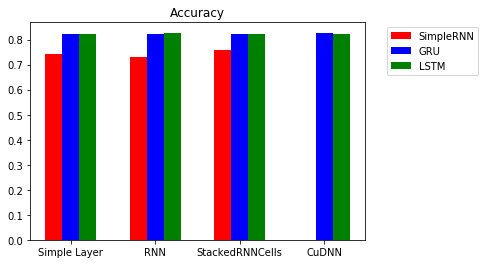

In [108]:
#各手法のAccuracyリスト
simplernn = [simplernn_acc, rcell_acc, srs_acc, 0]  
gru = [gru_acc, gcell_acc, srg_acc, cg_acc]
lstm = [lstm_acc, lcell_acc, srl_acc, cl_acc]
 
#numpyで横軸を設定
left = np.arange(4)

#ラベル
labels = ['Simple Layer', 'RNN', 'StackedRNNCells', 'CuDNN']
idx = ['SimpleRNN', 'GRU', 'LSTM']
 
#幅
width = 0.2

#棒グラフの出力
p1 = plt.bar(left, simplernn, color='r', width=width, align='center')
p2 = plt.bar(left+width, gru, color='b', width=width, align='center')
p3 = plt.bar(left+width+width, lstm, color='g', width=width, align='center')
plt.legend([p1, p2, p3], idx, bbox_to_anchor=(1.05, 1))
plt.xticks(left + width, labels)
plt.title('Accuracy')
plt.show()

In [109]:
import pandas as pd

#Accuracyの表
df_acc = pd.DataFrame([simplernn, gru, lstm], index=idx, columns=labels)
df_acc

,Simple Layer,RNN,StackedRNNCells,CuDNN
SimpleRNN,0.74340,0.73172,0.75756,0.00000
GRU,0.82196,0.82276,0.82104,0.82580
LSTM,0.82424,0.82752,0.82296,0.82324


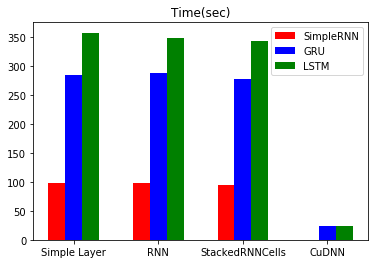

In [110]:
#各手法のTimeリスト
simplernn = [simplernn_time, rcell_time, srs_time, 0]  
gru = [gru_time, gcell_time, srg_time, cg_time]
lstm = [lstm_time, lcell_time, srl_time, cl_time]
 
#numpyで横軸を設定
left = np.arange(4)

#ラベル
labels = ['Simple Layer', 'RNN', 'StackedRNNCells', 'CuDNN']
idx = ['SimpleRNN', 'GRU', 'LSTM']
 
#幅
width = 0.2

#棒グラフの出力
plt.bar(left, simplernn, color='r', width=width, align='center')
plt.bar(left+width, gru, color='b', width=width, align='center')
plt.bar(left+width+width, lstm, color='g', width=width, align='center')
plt.legend([p1, p2, p3], idx)
plt.title('Time(sec)')
plt.xticks(left + width, labels)
plt.show()

In [111]:
#時間の表
df_time = pd.DataFrame([simplernn, gru, lstm], index=idx, columns=labels)
df_time

,Simple Layer,RNN,StackedRNNCells,CuDNN
SimpleRNN,97.962968,98.045285,94.659149,0.000000
GRU,284.917903,287.241104,277.652677,23.415816
LSTM,357.099679,347.677578,342.618382,23.239107


今回の比較は、SimpleRNN、GRU、 LSTMの比較と、Layer単独、RNN、 StackedRNNCells、CuDNNの比較をAccuracy、実行時間で行なった。また、今回は1レイヤーのみ、エポック数3、バッチサイズ32、中間層のユニット数16で固定した。

Accuracyに関して、LSTMとGRUはほぼ同じで、SimpleRNNが他の2つに比べると少し精度が落ちていた。また、Layer単独の場合と、RNN、StackedRNNCells、CuDNNでの比較では差はあまりみられなかった。

実行時間では、CuDNN以外では、LSTM、 GRU、SimpleRNNの順で短くなっており、CuDNNではLSTMとGRUに差はあまりなかった。また、StackedRNNCellsを用いた場合、Layer単独の場合とRNNクラスを用いた場合と比較するとわずかに短かった。しかし、GPU環境下でのみ実行できるCuDNNが圧倒的に速かった。

### ConvLSTM2D

In [0]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

#モデル
K.clear_session()
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

#コンパイル
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [0]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

#ムービーを作成する関数
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [18]:
#ムービーを作成
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

#学習
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 56s 59ms/step - loss: 0.2564 - val_loss: 0.0625
Epoch 2/3
950/950 [==============================] - 48s 51ms/step - loss: 0.0217 - val_loss: 0.0110
Epoch 3/3
950/950 [==============================] - 48s 51ms/step - loss: 0.0035 - val_loss: 0.0027


In [0]:
#7番目まで四角形の位置を渡し、それ以降予測
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

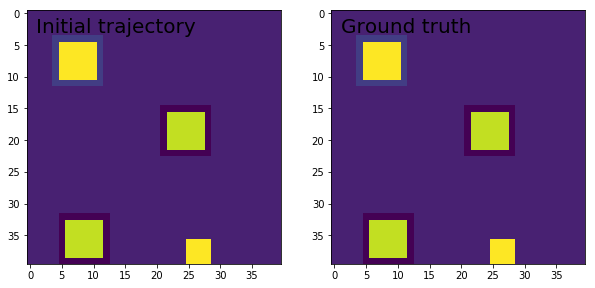

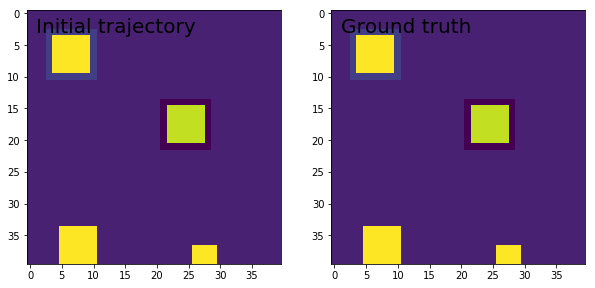

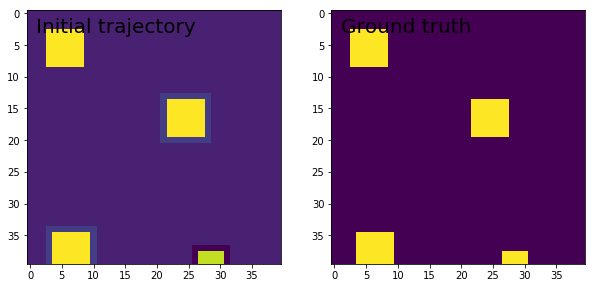

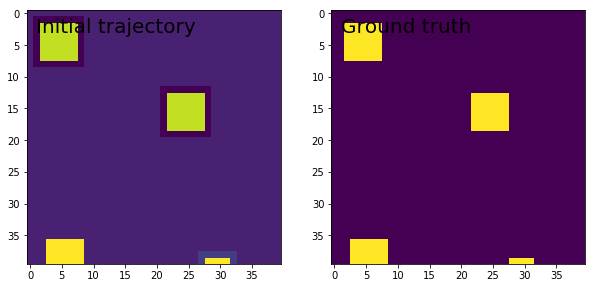

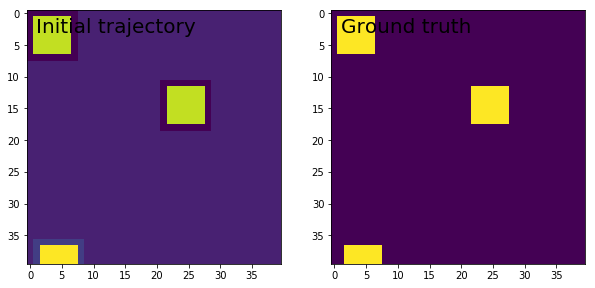

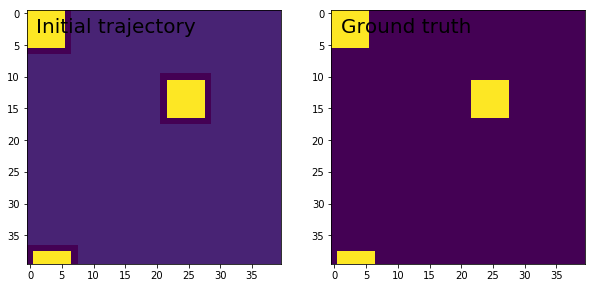

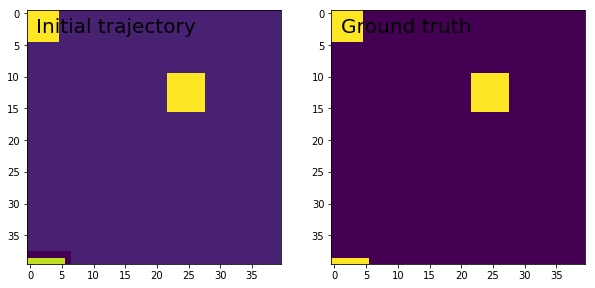

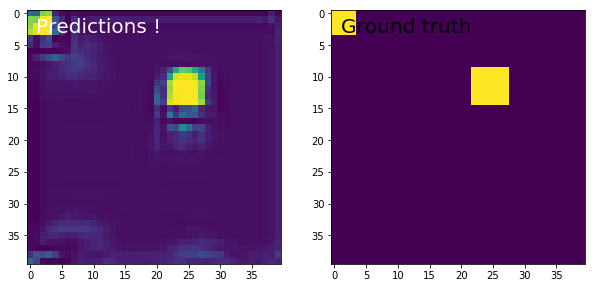

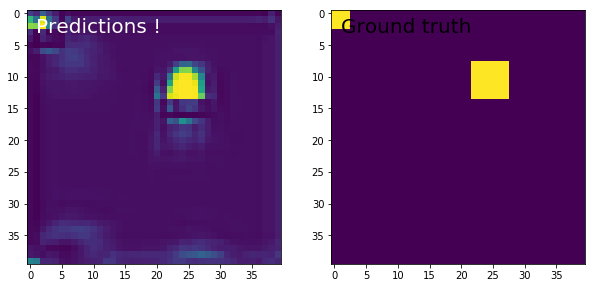

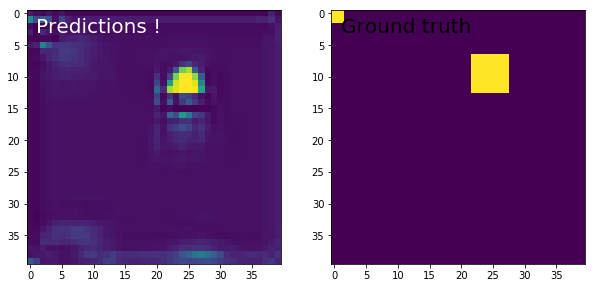

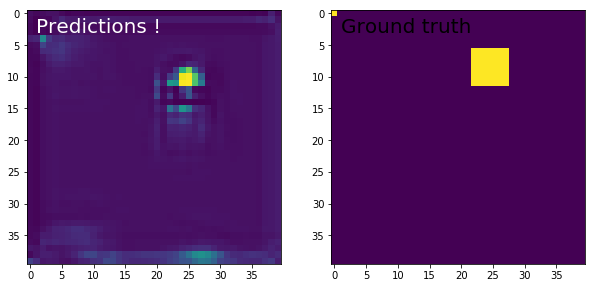

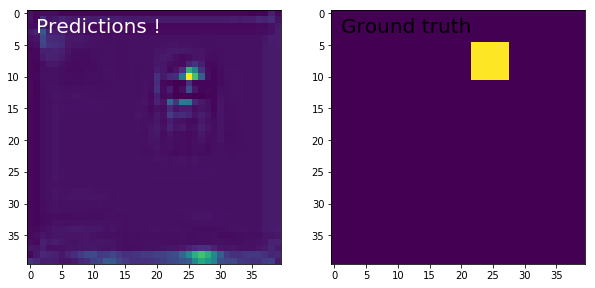

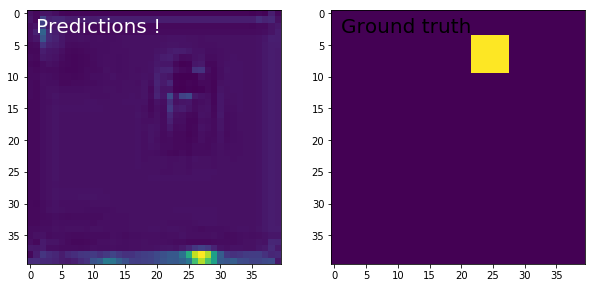

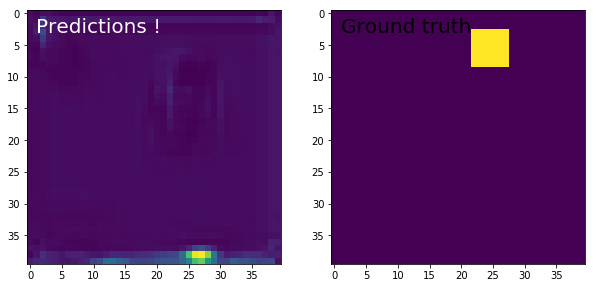

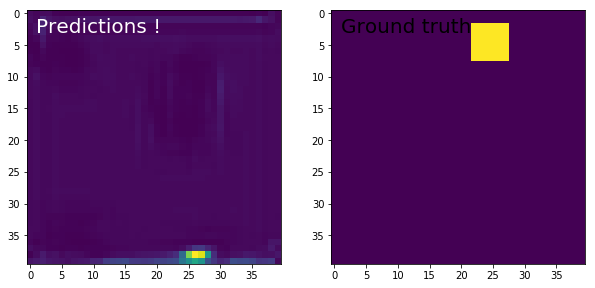

In [20]:
#結果を出力
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

左が予測した結果で、右が正解のムービーである。

### RNN

Recurrentレイヤーに対する基底クラス。引数のcellにcellクラス(LSTMCellなど)を入れて用いる。

**引数**
- cell: RNN cellインスタンス．RNN cellは以下の属性を持つクラス．
  - call(input_at_t, states_at_t)メソッド，これは(output_at_t, states_at_t_plus_1)を返す． cellのメソッド呼び出しはオプションの引数constantsも使える.
  - state_size属性． これは1つの整数（1つの状態）でもよく，その場合はrecurrent stateのサイズになる（これはcellの出力のサイズと同じである必要がある）． （1つ状態につき1つのサイズが対応するように）整数やリストやタプルもとれる． この場合は最初のエントリ(state_size\[0\])がcellの出力のサイズと同じである必要がある．  cellをRNN cellインスタンスのリストとすることも可能． この場合，cellはRNNの中で他のcellの後にスタックされていれば，効率的なstacked RNNが実現される．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値．Trueなら，入力系列を逆向きから処理し，逆順の系列を返す．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．
- unroll: 真理値．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われる． 展開はよりメモリ集中傾向になるが，RNNをスピードアップできる． 展開は短い系列にのみ適している．
- input_dim: 入力の次元（整数）． この引数（または代わりのキーワード引数input_shape）は， このレイヤーをモデルの最初のレイヤーとして利用するときに必要．
- input_length: 入力系列の長さ． この引数はこのレイヤーの後にFlattenからDenseレイヤーへ接続する際に必要 (これがないと，denseの出力のshapeを計算できない）． Recurrentレイヤーがモデルの最初のレイヤーでなければ， 最初のレイヤーのレベルで入力系列の長さを指定する必要がある （例えばinput_shape引数を通じて）．


### SimpleRNN

1つ前の出力が入力にフィードバックされる全結合RNN。時系列データ、前後のデータに意味のあるデータに対して、その特徴を学習できる。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．  Noneを渡すと活性化関数は適用されない (例．"linear" activation: a(x) = x)．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値．Trueなら，入力系列の後ろから処理し，逆順の系列を返します．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．
- unroll: 真理値．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われます． 展開はよりメモリ集中傾向になりますが，RNNをスピードアップできます． 展開は短い系列にのみ適している．


### GRU

ゲート付き回帰型ユニット。LSTMより構造は少しシンプルで、input gateとforget gateが同じになっている。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．  Noneを渡すと活性化関数は適用されない(例．"linear" activation: a(x) = x)．
- recurrent_activation: 再帰計算時に使う活性化関数．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理する． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるだろう．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値．Trueなら，入力系列の後ろから処理し，逆順の系列を返す．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．
- unroll: 真理値．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われる． 展開はよりメモリ集中傾向になるが，RNNをスピードアップできる． 展開は短い系列にのみ適している．
- reset_after: GRUの慣習（行列の乗算の前後のどちらでリセットゲートの適用を行うか）．False = "before" (デフォルト), True = "after" (CuDNN互換).


### LSTM

長短期記憶ユニット。RNNより長期のデータの特徴を学習できる。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．  Noneを渡すと活性化関数は適用されない (例．"linear" activation: a(x) = x)．
- recurrent_activation: 再帰計算時に使う活性化関数．  Noneを渡すと活性化関数は適用されない (例．"linear" activation: a(x) = x)．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのbiasに1加算．また，trueの場合は強制的にbias_initializer="zeros"になる.
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- activity_regularizer: 出力（そのactivation）に適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理する． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるだろう．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値．Trueなら，入力系列の後ろから処理し，逆順の系列を返す．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．
- unroll: 真理値．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われる． 展開はよりメモリ集中傾向になるが，RNNをスピードアップできる． 展開は短い系列にのみ適している．


### ConvLSTM2D

LSTMの入力の変換とリカレントの変換が畳み込みになったもの。

**引数**

- filters: 整数，出力空間の次元（つまり畳み込みにおける出力フィルタの数）．
- kernel_size: 整数かn個の整数からなるタプル/リストで，n次元の畳み込みウィンドウを指定する．
- strides: 整数かn個の整数からなるタプル/リストで，畳み込みのストライドをそれぞれ指定できる．
- padding: "valid"か"same"のどちらかを指定する．
- data_format: 文字列，channels_lastかchannels_firstのどちらかを指定する． これは入力における次元の順序である．  "channels_last"の場合，入力のshapeは(batch, time, ..., channels)となり，"channels_first"の場合は(batch, time, channels, ...)となる． 
- dilation_rate: 整数かn個の整数からなるタプル/リストで，dilated convolutionで使われる膨張率を指定する．
- activation: 使用する活性化関数の名前， 何も指定しなければ，活性化は一切適用されない（つまり"線形"活性a(x) = x）．
- recurrent_activation: recurrentステップで適用される活性化関数．
- use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか．
- kernel_initializer: kernelの重み行列の初期値を指定する．入力の線形変換に使われる．
- recurrent_initializer: recurrent_kernelの重み行列の初期値を指定する． recurrent stateの線形変換に使われます．
- bias_initializer: バイアスベクトルの初期値を指定する．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加える． bias_initializer="zeros"とともに用いられる． 
- kernel_regularizer: kernelの重み行列に適用させるRegularizerを指定する．
- recurrent_regularizer: recurrent_kernelの重み行列に適用させるRegularizerを指定する．
- bias_regularizer: バイアスベクトルに適用させるRegularizerを指定する．
- activity_regularizer: 出力テンソルに適用させるRegularizerを指定する．
- kernel_constraint: kernelの重み行列に適用させるConstraintを指定する．
- recurrent_constraint: recurrent_kernelの重み行列に適用させるConstraintを指定する．
- bias_constraint: バイアスベクトルに適用させるConstraintを指定する．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- go_backwards: 真理値．Trueなら，入力系列の後ろから処理し，逆順の系列を返す．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．

**Input shape**

- data_format='channels_first'の場合は次の5次元shape：(samples,time, channels, rows, cols)
- data_format='channels_last'の場合は次の5次元shape：(samples,time, rows, cols, channels)

**Output shape**

- return_sequencesの場合
    - data_format='channels_first'なら次の５次元shape： (samples, time, filters, output_row, output_col)
    - data_format='channels_last'なら次の5次元shape： (samples, time, output_row, output_col, filters)
- それ以外の場合
    - data_format='channels_first'なら次の4次元shape： (samples, filters, output_row, output_col)
    - data_format='channels_last'なら次の4次元shape： (samples, output_row, output_col, filters) o_rowsとo_colsはフィルタのshapeやパディングに依存する．

### SimpleRNNCell

SimpleRNNのCellクラス。RNN()の引数に入れる。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．  Noneを渡すと活性化関数は適用されない（つまり"線形"活性: a(x) = x）．
- use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: バイアスベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．

### GRUCell

GRUレイヤーのためのCellクラス。RNN ()の引数に入れる。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．  Noneを渡すと活性化関数は適用されない（つまり"線形"活性: a(x) = x）．
- recurrent_activation: 再帰計算時に使う活性化関数．
- use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理する． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるだろう．
- reset_after: GRUの慣習（行列の乗算の前後のどちらでリセットゲートの適用を行うか）．False = "before" (デフォルト), True = "after" (CuDNN互換).

### LSTMCell

LSTMレイヤーのためのcellクラス。RNN ()の引数に入れる。

**引数**

- units: 正の整数値，出力の次元数．
- activation: 活性化関数．Noneを渡すと活性化関数は適用されない（つまり"線形"活性: a(x) = x）．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加える． bias_initializer="zeros"とともに用いられる.
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理する． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるだろう．

### StackedRNNCells

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。効率的なstacked RNNを実装するために使われる。RNN()の引数にStackedRNNCells()を入れ、StackedRNNCells()の引数にcellのリストを入れる。

**引数**

cells: RNN cellインスタンスのリスト．

### CuDNNGRU

CuDNNを用いて、GRUを高速化している。TensorFlowバックエンドでGPU上でのみ動作する。

**引数**

- units: 正の整数値，出力の次元数．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．

### CuDNNLSTM

CuDNNを用いて、LSTMを高速化している。TensorFlowバックエンドでGPU上でのみ動作する。

**引数**

- units: 正の整数値，出力の次元数．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加える． bias_initializer="zeros"とともに用いられる．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer．
- bias_initializer: biasベクトルのInitializer．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数．
- bias_regularizer: biasベクトルに適用するRegularizer関数．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数．
- kernel_constraint: kernelの重み行列に適用するConstraint関数．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数．
- bias_constraint: biasベクトルに適用するConstraint関数．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- stateful: 真理値．Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われる．


## 【問題3】（アドバンス課題）複数のデータセット間での比較

単一のデータセットでの実験に留めず、他のデータセットでも実験してみます。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。IMDBは2値分類であったが、こちらは46値分類の問題です。